In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root = r"C:\Users\mathe\Documents\Stanford\Stats 207\Final Project\granger-casusality-agro\Data"
df = pd.read_csv(root + "\n_fires_per_state_1998_2022.csv")

OSError: [Errno 22] Invalid argument: 'C:\\Users\\mathe\\Documents\\Stanford\\Stats 207\\Final Project\\granger-casusality-agro\\Data\n_fires_per_state_1998_2022.csv'

In [ ]:
df = df.iloc[:, 1:].drop('Total', axis = 1)
df.rename(columns = {'Unnamed: 0.1': 'year', 'State': 'state', 'Janeiro': 1, "Fevereiro": 2,
                     "Março":3, "Abril": 4, "Maio": 5, "Junho": 6, "Julho": 7,
                     "Agosto": 8, "Setembro":9, "Outubro": 10, "Novembro":11,
                     "Dezembro": 12}, inplace = True)
df.replace('-', 0, inplace = True)

In [ ]:
df = pd.melt(df, id_vars=['state', 'year'], value_vars=np.arange(1,13), var_name = "month", value_name = 'fires')

In [ ]:
df['day'] = 1
df['date'] = pd.to_datetime(df[['year','month', 'day']])
df = df.sort_values('date')

In [ ]:
df

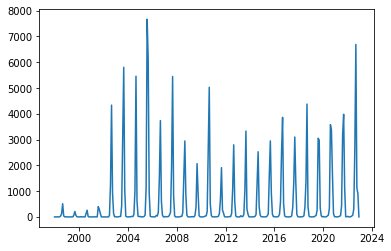

In [67]:
plt.plot(df[df.state == "acre"]['date'], df[df.state == "acre"]['fires'])

In [71]:
df = df.loc[(df.date >= '1998-06-01') & (df.date <= '2022-01-01')]

In [72]:
df

,state,year,month,fires,day,date
3700,para,1998,6,58,1,1998-06-01
4025,tocantins,1998,6,252,1,1998-06-01
3950,santa_catarina,1998,6,2,1,1998-06-01
3925,roraima,1998,6,0,1,1998-06-01
3900,rondonia,1998,6,27,1,1998-06-01
...,...,...,...,...,...,...
5849,piaui,2022,9,2731,1,2022-09-01
5824,pernambuco,2022,9,171,1,2022-09-01
5799,parana,2022,9,85,1,2022-09-01
5924,rio_grande_do_sul,2022,9,119,1,2022-09-01


In [73]:
df.to_csv(root + "/n_fires_times_series.csv")